# 1. Initialization

Goals:
Load data; drop rows and columns with excessive NaN values; 

### 1.A. Load data, pre-processing, imputation of missing values

In [1]:
#Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in data with outliers removed. 
df = pd.read_excel('Outliers_Removed.xlsx')

In [3]:
# What is the shape of the loaded data? 
df.shape

(7524, 88)

In [4]:
#Drop rows and columns with too many NaNs
df = df.dropna(thresh=5000, axis='columns') #Drop columns that have at least 3000 non-NaN values
df = df.dropna(how='any', thresh=40) # Rows/observations should have at least 30 non-NaN values 

#Shape of the refined data
df.shape

(5525, 50)

In [1]:
#Check: how many remaining null values are there for each feature?
#df.isnull().sum()

#Show the features with null values as a percent of the total values
#df.isnull().sum()/len(df)

# Table below shows acceptable values for missing data (feature with highest missing data is ~14%)
# Imputing NaN values with the mean average of each column is more reliable with less missing data. 

In [6]:
# Create a dataframe with the NaN values filled in with the mean of column features
df_og = df.fillna(df.mean())    

In [2]:
#df_og.columns

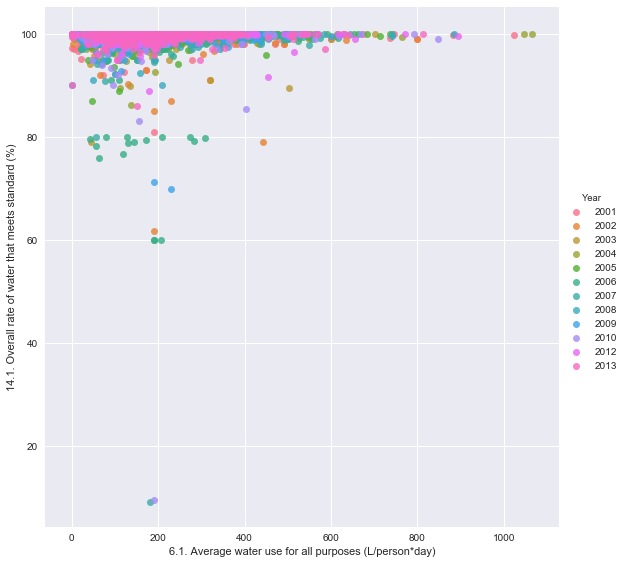

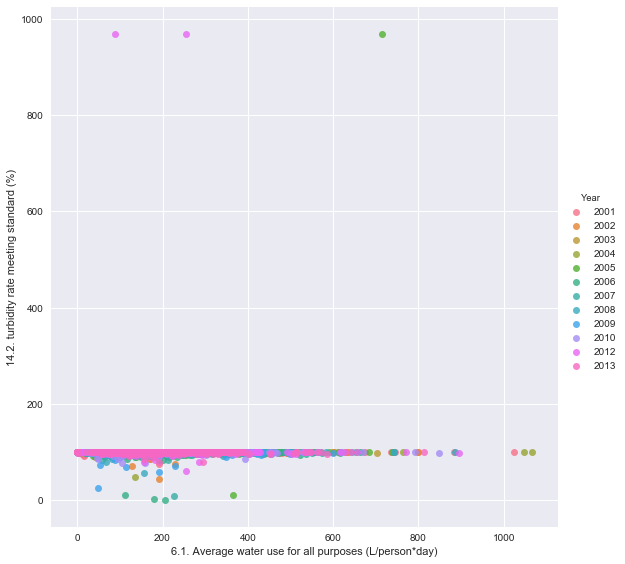

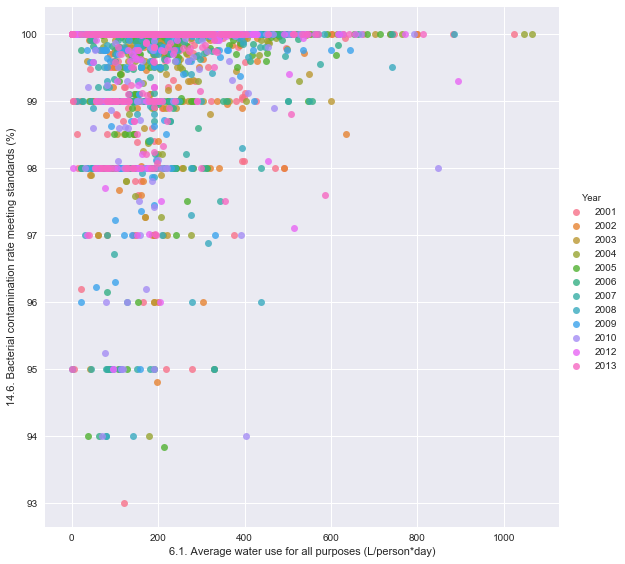

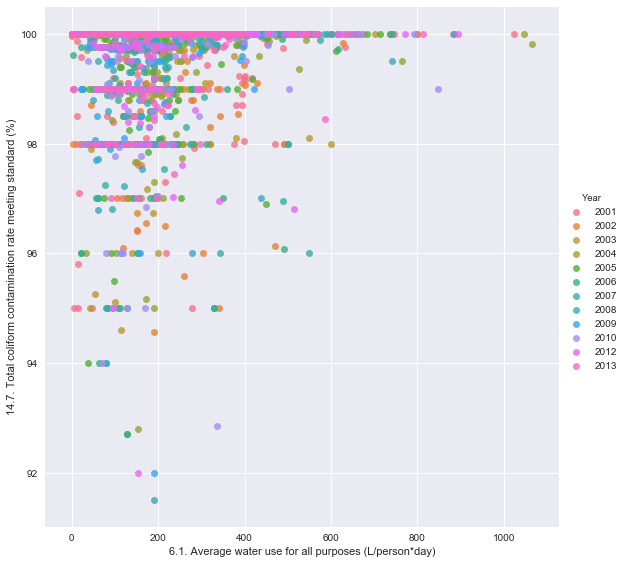

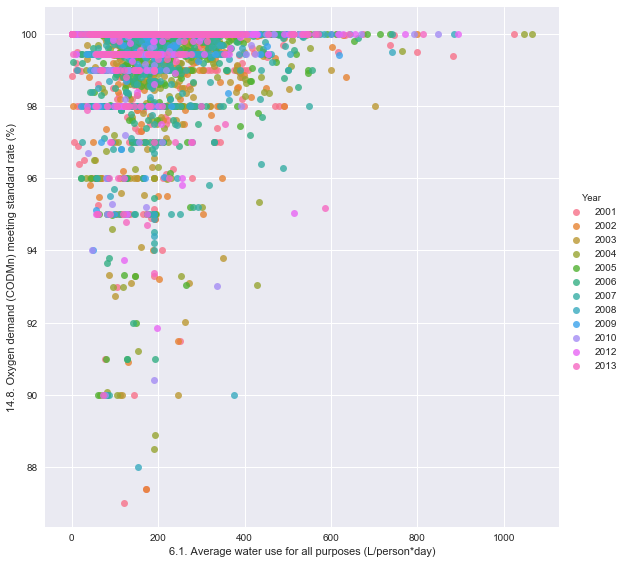

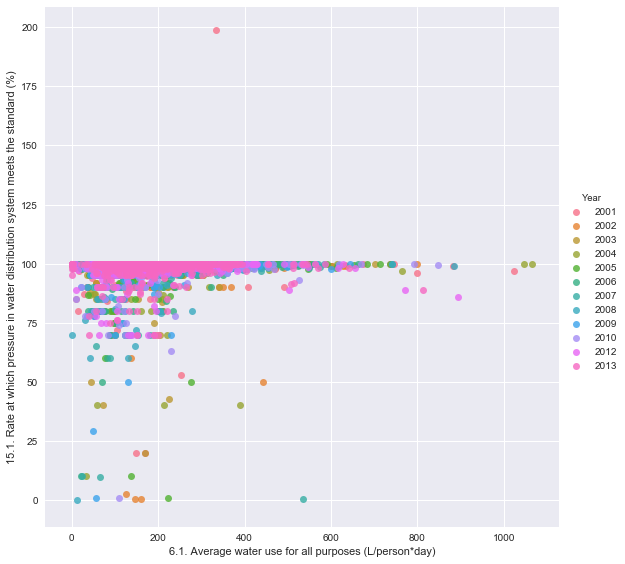

In [19]:
# Provinces that use less water tend to have lower quality standards
Y = ['14.1. Overall rate of water that meets standard (%)',
       '14.2. turbidity rate meeting standard (%)',
       '14.6. Bacterial contamination rate meeting standards (%)',
       '14.7. Total coliform contamination rate meeting standard (%)',
       '14.8. Oxygen demand (CODMn) meeting standard rate (%)',
       '15.1. Rate at which pressure in water distribution system meets the standard (%)']

for y in Y:
    x = '6.1. Average water use for all purposes (L/person*day)'
    sns.lmplot(x,y, data=df_og, hue = 'Year', truncate=True, size=8, fit_reg=False)
    plt.show()

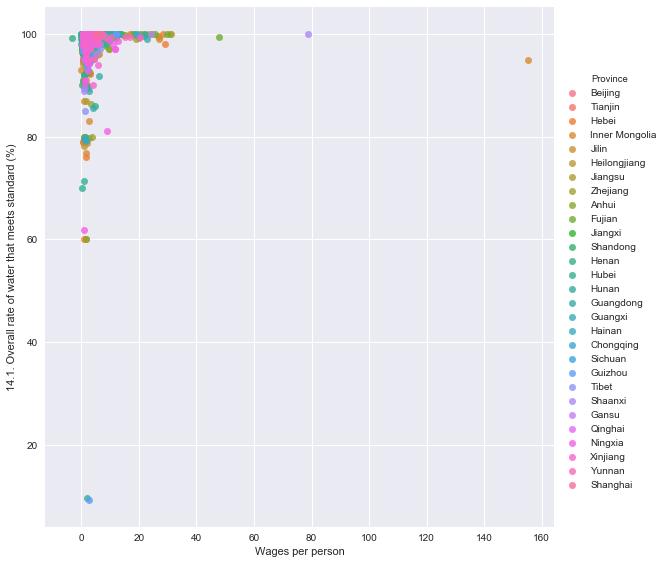

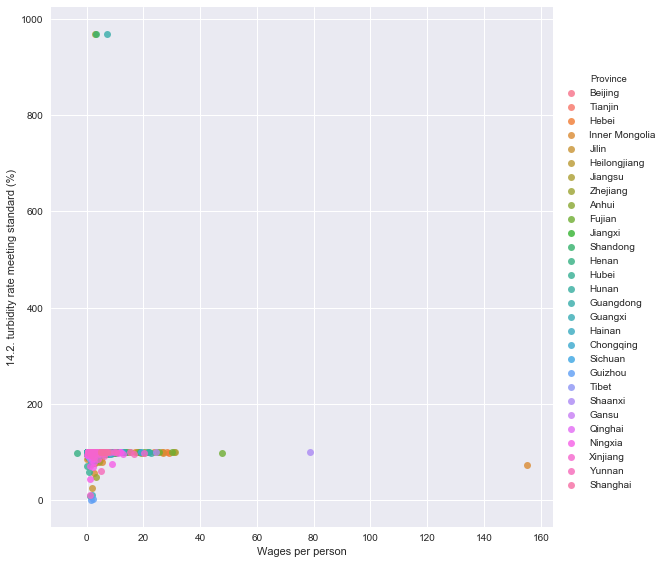

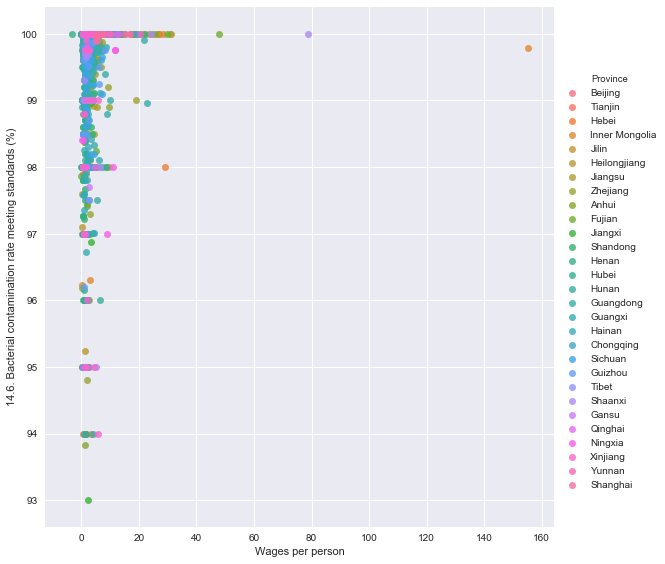

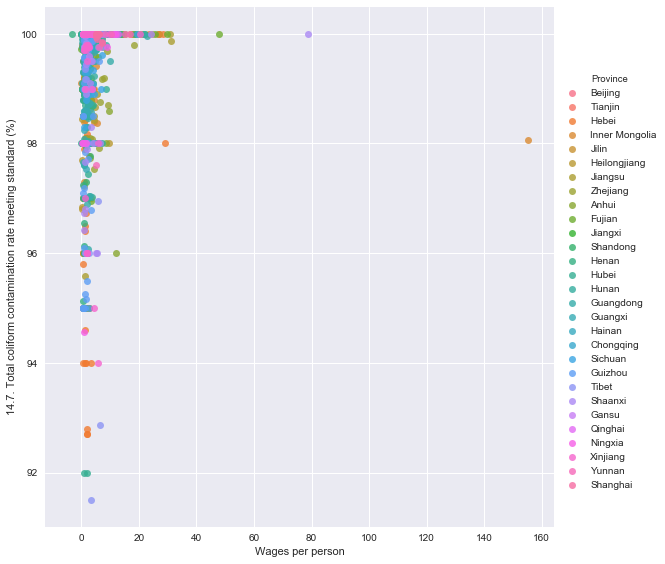

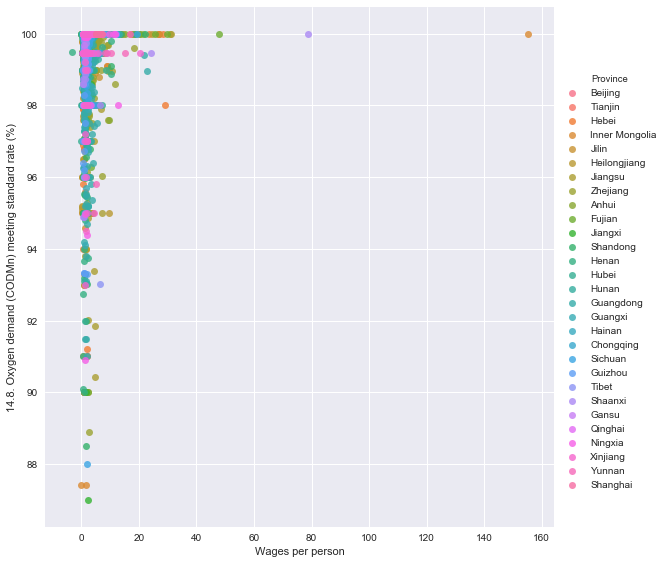

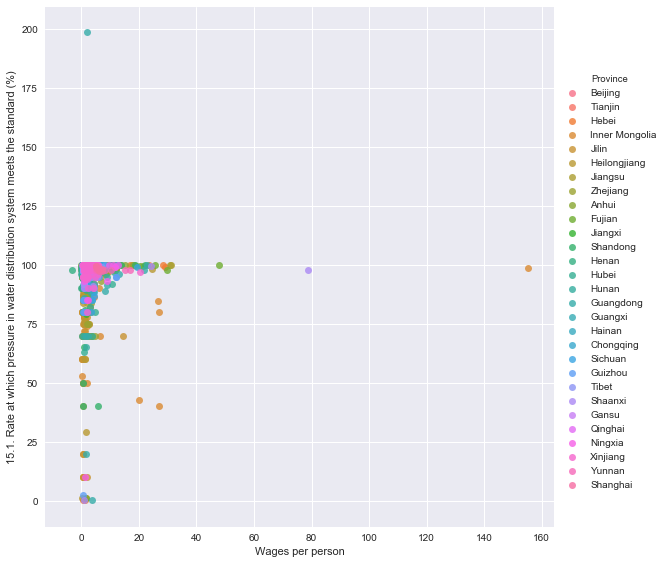

In [26]:
# Provinces with lower wages per employee tend to have lower quality standards
Y = ['14.1. Overall rate of water that meets standard (%)',
       '14.2. turbidity rate meeting standard (%)',
       '14.6. Bacterial contamination rate meeting standards (%)',
       '14.7. Total coliform contamination rate meeting standard (%)',
       '14.8. Oxygen demand (CODMn) meeting standard rate (%)',
       '15.1. Rate at which pressure in water distribution system meets the standard (%)']
df_og['Wages per person'] = df_og['24. Total wages (10,000 yuan)']/df_og['25.1. Total employees (persons)']
for y in Y:
    x = 'Wages per person'
    sns.lmplot(x,y, data=df_og, hue = 'Province', truncate=True, size=8, fit_reg=False)
    plt.show()

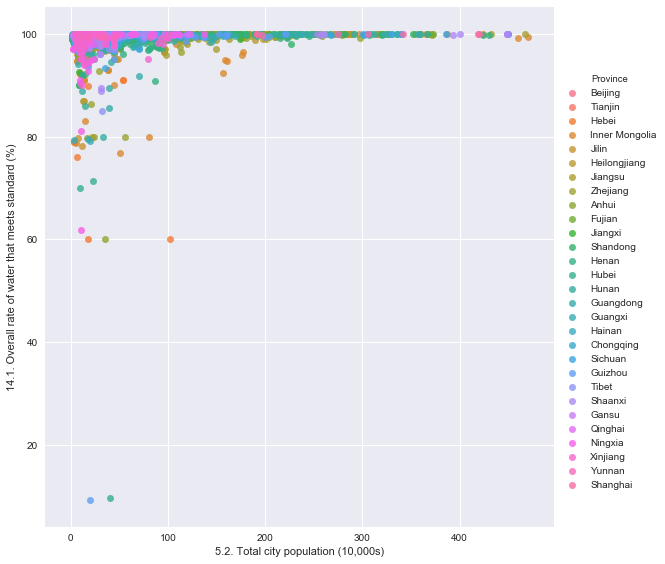

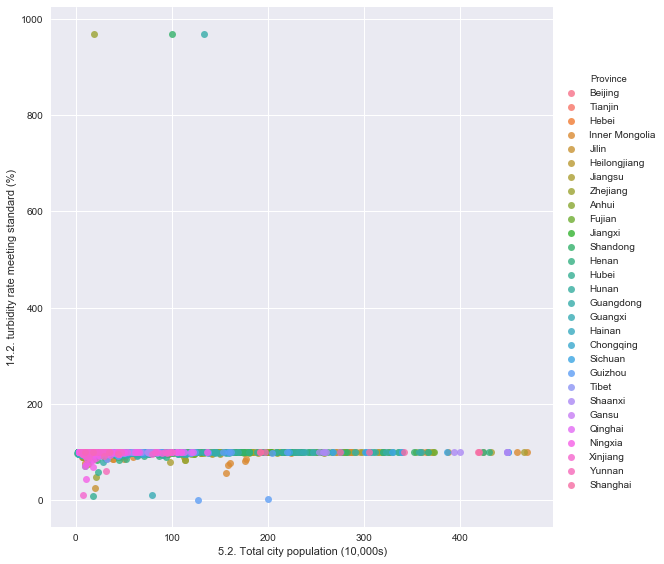

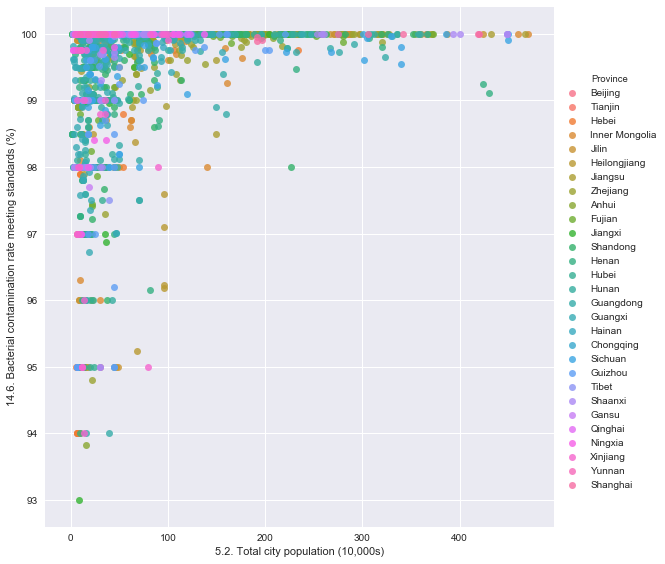

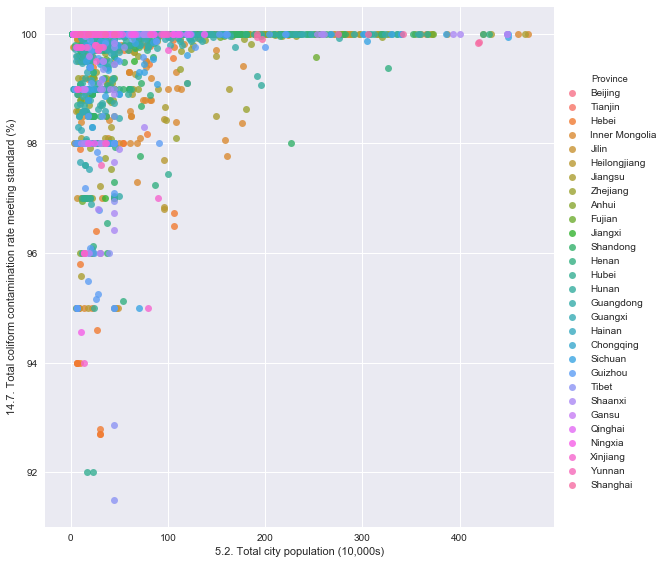

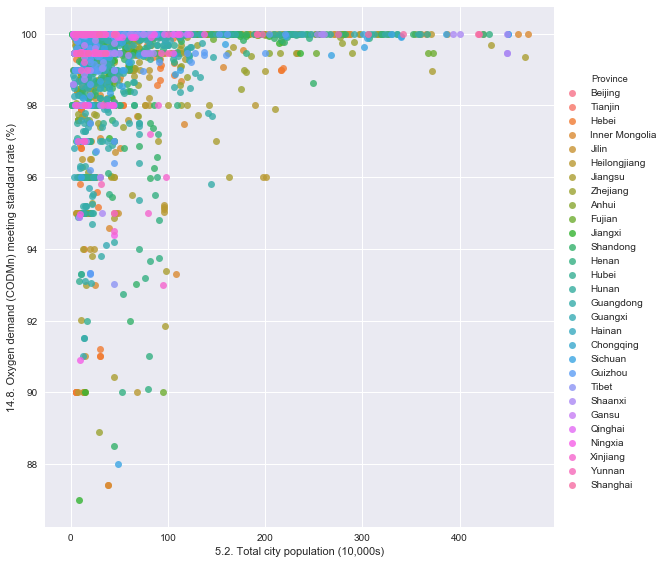

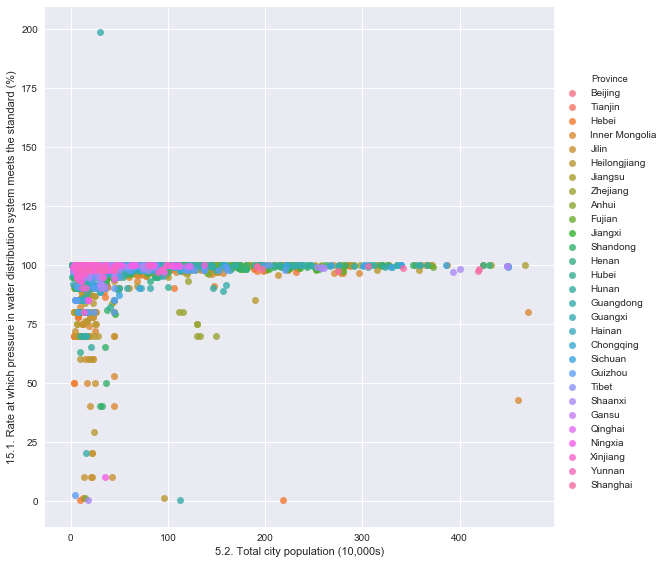

In [27]:
# Provinces with lower population tend to have lower quality standards
Y = ['14.1. Overall rate of water that meets standard (%)',
       '14.2. turbidity rate meeting standard (%)',
       '14.6. Bacterial contamination rate meeting standards (%)',
       '14.7. Total coliform contamination rate meeting standard (%)',
       '14.8. Oxygen demand (CODMn) meeting standard rate (%)',
       '15.1. Rate at which pressure in water distribution system meets the standard (%)']

for y in Y:
    x = '5.2. Total city population (10,000s)'
    sns.lmplot(x,y, data=df_og, hue = 'Province', truncate=True, size=8, fit_reg=False)
    plt.show()